In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('yield_df.csv')

In [3]:
df.head(10)

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37
5,5,Albania,Wheat,1990,30197,1485.0,121.0,16.37
6,6,Albania,Maize,1991,29068,1485.0,121.0,15.36
7,7,Albania,Potatoes,1991,77818,1485.0,121.0,15.36
8,8,Albania,"Rice, paddy",1991,28538,1485.0,121.0,15.36
9,9,Albania,Sorghum,1991,6667,1485.0,121.0,15.36


In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df.shape

(28242, 7)

In [6]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB
None


In [7]:
df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
summary = df.describe()

print(summary)

               Year    hg/ha_yield  average_rain_fall_mm_per_year  \
count  25932.000000   25932.000000                   25932.000000   
mean    2001.556455   76978.132925                    1146.836688   
std        7.055924   84647.605552                     717.391098   
min     1990.000000      50.000000                      51.000000   
25%     1995.000000   19996.000000                     593.000000   
50%     2001.000000   39530.000000                    1083.000000   
75%     2008.000000  104168.000000                    1668.000000   
max     2013.000000  501412.000000                    3240.000000   

       pesticides_tonnes      avg_temp  
count       25932.000000  25932.000000  
mean        34782.573241     20.422251  
std         57228.568244      6.439402  
min             0.040000      1.300000  
25%          1597.000000     16.580000  
50%         15373.000000     21.420000  
75%         45620.000000     26.060000  
max        367778.000000     30.650000  


# Transforming average_rain_fall_mm_per_year
In summary, this code identifies the indices of rows in the DataFrame df where the values in the column 'average_rain_fall_mm_per_year' are not numeric strings. These rows can be considered for removal or further processing, depending on the specific use case.

In [11]:
def isStr(obj):
    try:
        float(obj)
        return False
    except:
        return True
to_drop = df[df['average_rain_fall_mm_per_year'].apply(isStr)].index
print(to_drop)

Index([], dtype='int64')


In [12]:
df = df.drop(to_drop)

In [13]:
df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [14]:
df['average_rain_fall_mm_per_year'] = df['average_rain_fall_mm_per_year'].astype(np.float64)

# Graph Frequency vs Area

In [15]:
len(df['Area'].unique())

101

c:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


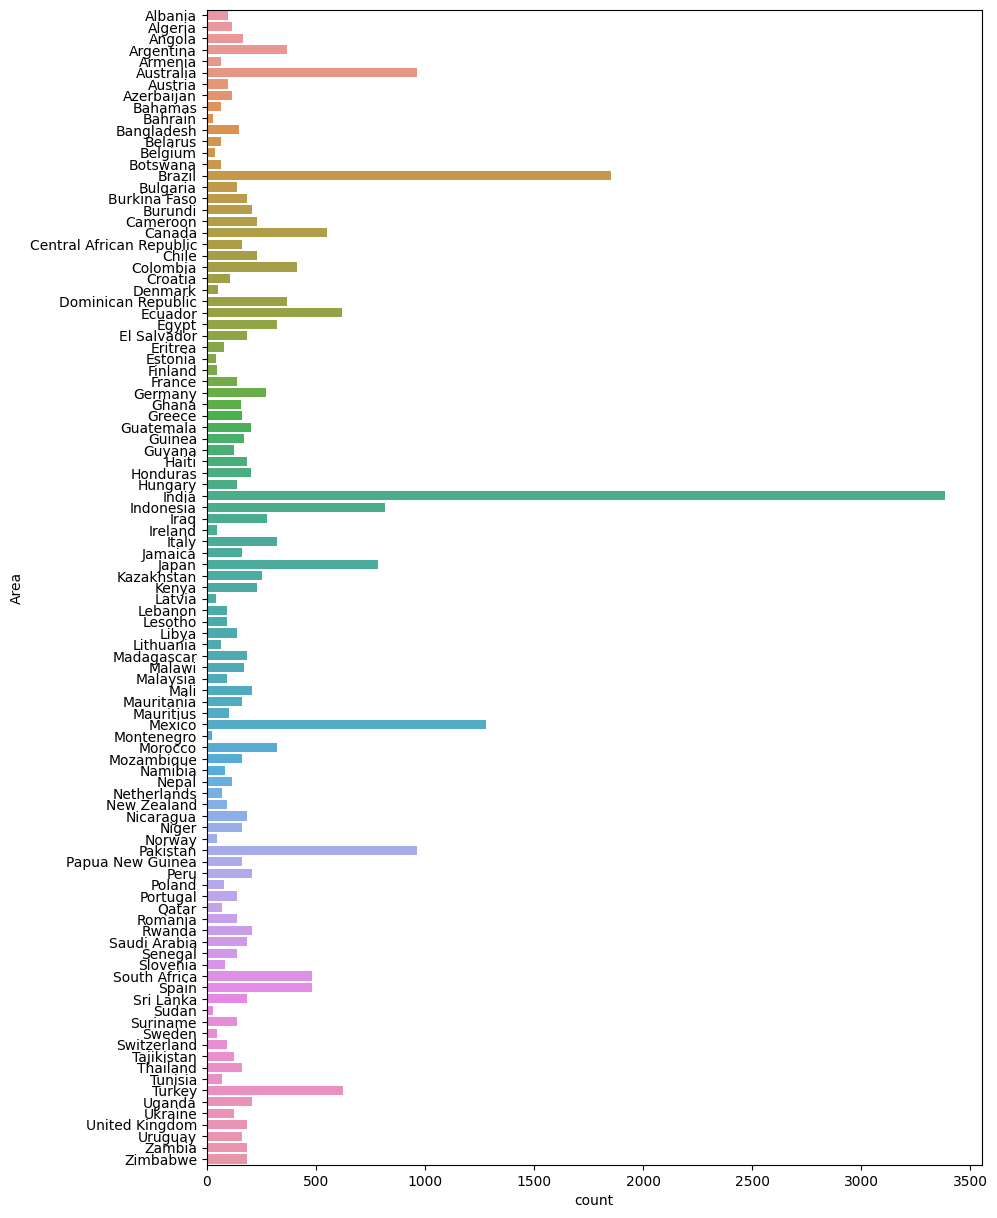

In [16]:
plt.figure(figsize=(10,15))
sns.countplot(y=df['Area'])
plt.show()

In [17]:
(df['Area'].value_counts() < 500).sum()

91

# yield_per_country

In [18]:
country = df['Area'].unique()
yield_per_country = {}
for state in country:
    yield_per_country[state] = df[df['Area']==state]['hg/ha_yield'].sum()

for country, total_yield in yield_per_country.items():
    print(f"Country: {country}, Total Yield: {total_yield}")

Country: Albania, Total Yield: 5711536
Country: Algeria, Total Yield: 6711464
Country: Angola, Total Yield: 5722563
Country: Argentina, Total Yield: 32864032
Country: Armenia, Total Yield: 4524100
Country: Australia, Total Yield: 109111062
Country: Austria, Total Yield: 10852258
Country: Azerbaijan, Total Yield: 4608380
Country: Bahamas, Total Yield: 4384717
Country: Bahrain, Total Yield: 4443889
Country: Bangladesh, Total Yield: 7720159
Country: Belarus, Total Yield: 4704812
Country: Belgium, Total Yield: 8442270
Country: Botswana, Total Yield: 470651
Country: Brazil, Total Yield: 136340329
Country: Bulgaria, Total Yield: 6263075
Country: Burkina Faso, Total Yield: 6083337
Country: Burundi, Total Yield: 7031146
Country: Cameroon, Total Yield: 10717883
Country: Canada, Total Yield: 34706922
Country: Central African Republic, Total Yield: 4255627
Country: Chile, Total Yield: 20561214
Country: Colombia, Total Yield: 26927138
Country: Croatia, Total Yield: 6083167
Country: Denmark, Total 

In [19]:
df['hg/ha_yield'].sum()

1996196943

In [20]:
yield_per_country


{'Albania': 5711536,
 'Algeria': 6711464,
 'Angola': 5722563,
 'Argentina': 32864032,
 'Armenia': 4524100,
 'Australia': 109111062,
 'Austria': 10852258,
 'Azerbaijan': 4608380,
 'Bahamas': 4384717,
 'Bahrain': 4443889,
 'Bangladesh': 7720159,
 'Belarus': 4704812,
 'Belgium': 8442270,
 'Botswana': 470651,
 'Brazil': 136340329,
 'Bulgaria': 6263075,
 'Burkina Faso': 6083337,
 'Burundi': 7031146,
 'Cameroon': 10717883,
 'Canada': 34706922,
 'Central African Republic': 4255627,
 'Chile': 20561214,
 'Colombia': 26927138,
 'Croatia': 6083167,
 'Denmark': 10701651,
 'Dominican Republic': 25312166,
 'Ecuador': 21315591,
 'Egypt': 36828848,
 'El Salvador': 16855944,
 'Eritrea': 1452416,
 'Estonia': 3595638,
 'Finland': 6210668,
 'France': 15790618,
 'Germany': 38780463,
 'Ghana': 9260371,
 'Greece': 14571925,
 'Guatemala': 16508723,
 'Guinea': 7975743,
 'Guyana': 8361103,
 'Haiti': 8619194,
 'Honduras': 10920131,
 'Hungary': 8824110,
 'India': 274219558,
 'Indonesia': 68067328,
 'Iraq': 109847

# Yield Per Country Graph

In [21]:
plt.figure(figsize=(15, 8))
sns.barplot(y=yield_per_country, x=country)

ValueError: Could not interpret input 'Zimbabwe'

<Figure size 1500x800 with 0 Axes>

# Graph Frequency vs Item

c:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='count', ylabel='Item'>

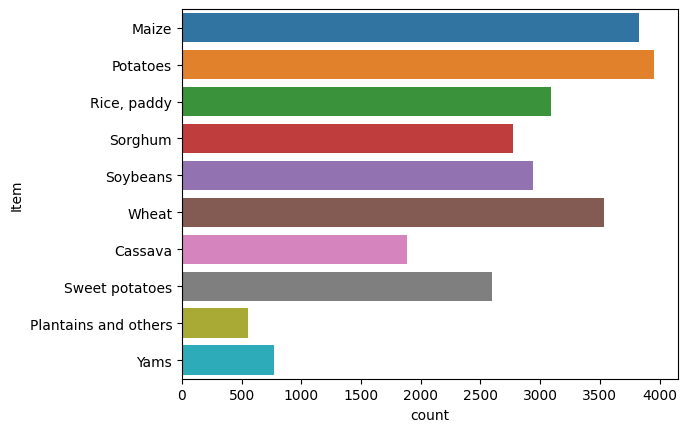

In [22]:
sns.countplot(y=df['Item'])

In [23]:
# Assuming df is your DataFrame and 'Item' is the column you want to count
item_counts = df['Item'].value_counts()
print(item_counts)


Item
Potatoes                3956
Maize                   3824
Wheat                   3539
Rice, paddy             3091
Soybeans                2940
Sorghum                 2770
Sweet potatoes          2593
Cassava                 1889
Yams                     774
Plantains and others     556
Name: count, dtype: int64


In [93]:

from sklearn.preprocessing import StandardScaler,MinMaxScaler,OrdinalEncoder
ordinal=OrdinalEncoder()
X_train['Area']=ordinal.fit_transform(X_train[['Area','Item']])
X_train['Item']=ordinal.fit_transform(X_train[['Item']])

<Axes: >

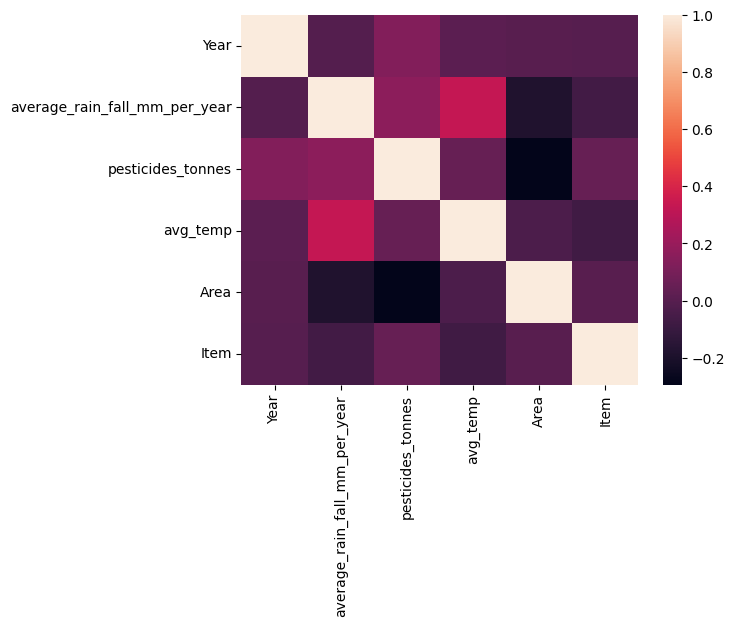

In [94]:
df.sample()
import seaborn as sns
sns.heatmap(X_train.corr())

# Yield Vs Item

In [24]:
crops = df['Item'].unique()
yield_per_crop = []
for crop in crops:
    yield_per_crop.append(df[df['Item']==crop]['hg/ha_yield'].sum())

c:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: >

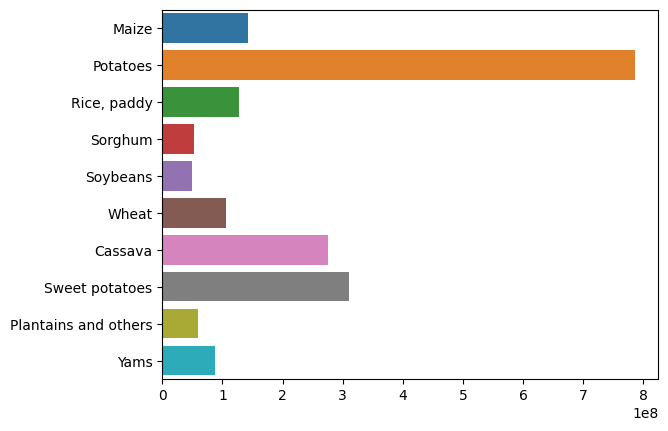

In [25]:
sns.barplot(y=crops,x=yield_per_crop)

# Train Test split Rearranging Columns

In [26]:
col = ['Year', 'average_rain_fall_mm_per_year','pesticides_tonnes', 'avg_temp', 'Area', 'Item', 'hg/ha_yield']
df = df[col]
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [27]:
df.head(3)

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,hg/ha_yield
0,1990,1485.0,121.0,16.37,Albania,Maize,36613
1,1990,1485.0,121.0,16.37,Albania,Potatoes,66667
2,1990,1485.0,121.0,16.37,Albania,"Rice, paddy",23333


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0, shuffle=True)

# Converting Categorical to Numerical and Scaling the values

In [29]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
ohe = OneHotEncoder(drop='first')
scale = StandardScaler()

preprocesser = ColumnTransformer(
        transformers = [
            ('StandardScale', scale, [0, 1, 2, 3]),
            ('OHE', ohe, [4, 5]),
        ],
        remainder='passthrough'
)

In [40]:
X_train_dummy = preprocesser.fit_transform(X_train)
X_test_dummy = preprocesser.transform(X_test)

In [41]:
print(X_train_dummy)


  (0, 0)	0.4954247915937623
  (0, 1)	-0.7521810808405797
  (0, 2)	-0.5695768841714229
  (0, 3)	-1.8400549389689067
  (0, 18)	1.0
  (0, 109)	1.0
  (1, 0)	-0.9210012422557905
  (1, 1)	-0.778717646669245
  (1, 2)	-0.47406579987392267
  (1, 3)	-1.5667953700185702
  (1, 44)	1.0
  (1, 111)	1.0
  (2, 0)	-1.204286449025701
  (2, 1)	-0.4086023864273333
  (2, 2)	-0.45194203405242334
  (2, 3)	-0.7920423875968766
  (2, 80)	1.0
  (2, 107)	1.0
  (3, 0)	1.4869230152884492
  (3, 1)	1.2632012607785845
  (3, 2)	-0.5926159119269865
  (3, 3)	1.0990380384344316
  (3, 50)	1.0
  (3, 110)	1.0
  (4, 0)	0.7787099983636728
  :	:
  (20740, 109)	1.0
  (20741, 0)	0.07049698143889649
  (20741, 1)	0.8176662871288871
  (20741, 2)	-0.5358207210055881
  (20741, 3)	-1.1103276809765303
  (20741, 72)	1.0
  (20741, 104)	1.0
  (20742, 0)	-0.49607343210092464
  (20742, 1)	-0.778717646669245
  (20742, 2)	-0.5164842012718367
  (20742, 3)	-1.5652427588313522
  (20742, 44)	1.0
  (20742, 108)	1.0
  (20743, 0)	-0.9210012422557905
 

In [42]:
df.describe()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield
count,25932.000000,25932.000000,25932.000000,25932.000000,25932.000000
mean,2001.556455,1146.836688,34782.573241,20.422251,76978.132925
std,7.055924,717.391098,57228.568244,6.439402,84647.605552
min,1990.000000,51.000000,0.040000,1.300000,50.000000
25%,1995.000000,593.000000,1597.000000,16.580000,19996.000000
50%,2001.000000,1083.000000,15373.000000,21.420000,39530.000000
75%,2008.000000,1668.000000,45620.000000,26.060000,104168.000000
max,2013.000000,3240.000000,367778.000000,30.650000,501412.000000


In [43]:
preprocesser.get_feature_names_out(col[:-1])

array(['StandardScale__Year',
       'StandardScale__average_rain_fall_mm_per_year',
       'StandardScale__pesticides_tonnes', 'StandardScale__avg_temp',
       'OHE__Area_Algeria', 'OHE__Area_Angola', 'OHE__Area_Argentina',
       'OHE__Area_Armenia', 'OHE__Area_Australia', 'OHE__Area_Austria',
       'OHE__Area_Azerbaijan', 'OHE__Area_Bahamas', 'OHE__Area_Bahrain',
       'OHE__Area_Bangladesh', 'OHE__Area_Belarus', 'OHE__Area_Belgium',
       'OHE__Area_Botswana', 'OHE__Area_Brazil', 'OHE__Area_Bulgaria',
       'OHE__Area_Burkina Faso', 'OHE__Area_Burundi',
       'OHE__Area_Cameroon', 'OHE__Area_Canada',
       'OHE__Area_Central African Republic', 'OHE__Area_Chile',
       'OHE__Area_Colombia', 'OHE__Area_Croatia', 'OHE__Area_Denmark',
       'OHE__Area_Dominican Republic', 'OHE__Area_Ecuador',
       'OHE__Area_Egypt', 'OHE__Area_El Salvador', 'OHE__Area_Eritrea',
       'OHE__Area_Estonia', 'OHE__Area_Finland', 'OHE__Area_France',
       'OHE__Area_Germany', 'OHE__Area_Ghana',

# Let's train our model

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error,r2_score
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

models = {
    'lr': LinearRegression(),
    'lss': Lasso(),
    'Rid': Ridge(),
    'Dtr': DecisionTreeRegressor(),
    'Rfr': RandomForestRegressor(),
}

for name, md in models.items():
    md.fit(X_train_dummy, y_train)
    y_pred = md.predict(X_test_dummy)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{name}: MAE: {mae}, MSE: {mse}, RMSE: {rmse}, MAPE: {mape}, R2 Score: {r2}")


lr: MAE: 29907.50933530433, MSE: 1817339513.6468327, RMSE: 42630.26523078214, MAPE: 91.17512087073743, R2 Score: 0.7473130309044326


C:\Users\ADMIN\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67280771830.01953, tolerance: 14848622817.505226
  model = cd_fast.sparse_enet_coordinate_descent(


lss: MAE: 29893.99762450549, MSE: 1817244976.0757167, RMSE: 42629.156408211, MAPE: 90.9442181312444, R2 Score: 0.7473261756207235
Rid: MAE: 29864.80254312207, MSE: 1817403559.4368637, RMSE: 42631.01640163959, MAPE: 90.78277706033663, R2 Score: 0.7473041258338915
Dtr: MAE: 3927.650857914016, MSE: 145349234.4308849, RMSE: 12056.08702817315, MAPE: 8.591339987686561, R2 Score: 0.9797903158804928
Rfr: MAE: 3700.9519240408713, MSE: 89255859.38486052, RMSE: 9447.531920287993, MAPE: 9.015080277807606, R2 Score: 0.9875896647750083


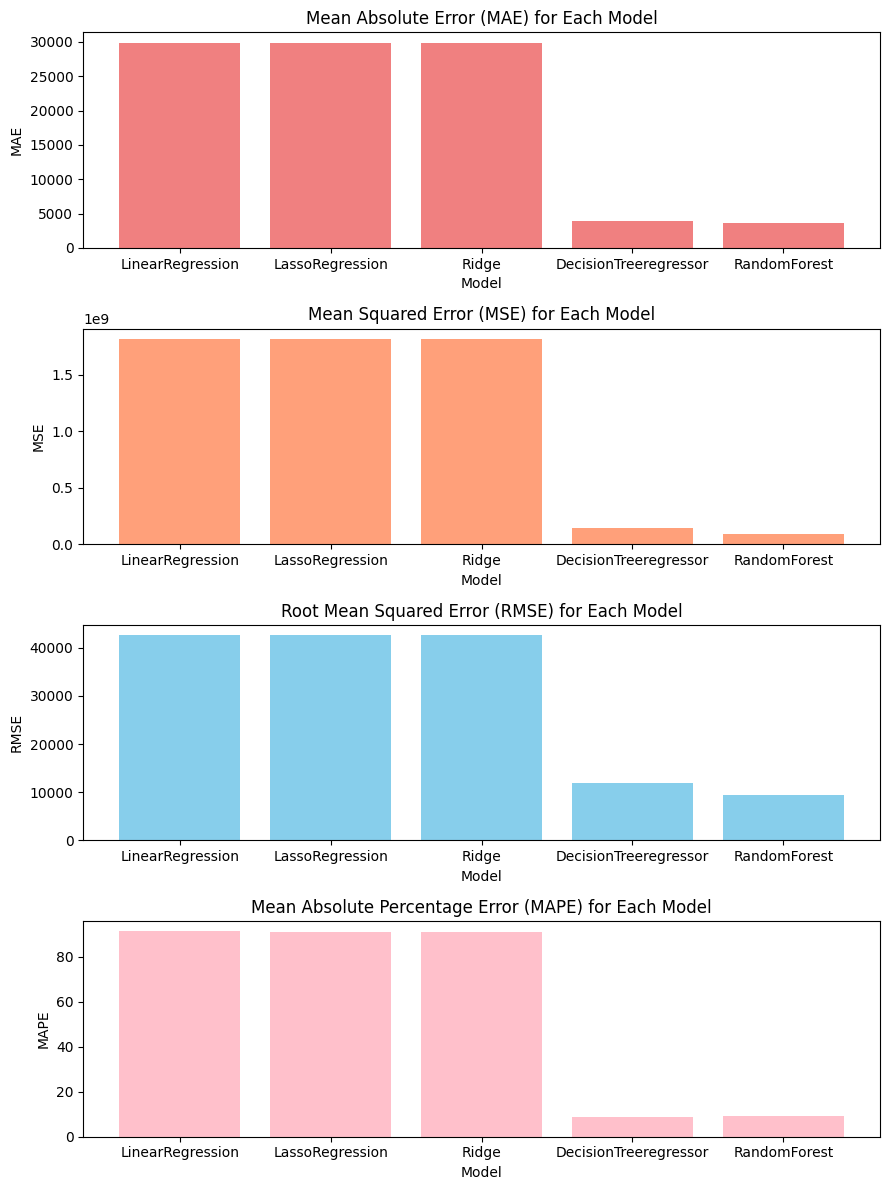

In [58]:
import matplotlib.pyplot as plt

models = ['LinearRegression', 'LassoRegression', 'Ridge', 'DecisionTreeregressor', 'RandomForest']
mae_scores = [29907.50933530433, 29893.99762450549, 29864.80254312207, 3944.6649315596683, 3691.0841873915556]
mse_scores = [1817339513.6468327, 1817244976.0757167, 1817403559.4368637, 144067309.2857143, 88179754.04573776]
rmse_scores = [42630.26523078214, 42629.156408211, 42631.01640163959, 12002.804225917971, 9390.407554826243]
mape_scores = [91.17512087073743, 90.9442181312444, 90.78277706033663, 8.591339987686561, 9.015080277807606]
r2_scores = [0.7473130309044326, 0.7473261756207235, 0.7473041258338915, 0.9799685576328501, 0.9877392888791059]

fig, ax = plt.subplots(4, 1, figsize=(9, 12))

# Plot MAE
ax[0].bar(models, mae_scores, color='lightcoral')
ax[0].set_title('Mean Absolute Error (MAE) for Each Model')
ax[0].set_xlabel('Model')
ax[0].set_ylabel('MAE')

# Plot MSE
ax[1].bar(models, mse_scores, color='lightsalmon')
ax[1].set_title('Mean Squared Error (MSE) for Each Model')
ax[1].set_xlabel('Model')
ax[1].set_ylabel('MSE')

# Plot RMSE
ax[2].bar(models, rmse_scores, color='skyblue')
ax[2].set_title('Root Mean Squared Error (RMSE) for Each Model')
ax[2].set_xlabel('Model')
ax[2].set_ylabel('RMSE')

# Plot MAPE
ax[3].bar(models, mape_scores, color='pink')
ax[3].set_title('Mean Absolute Percentage Error (MAPE) for Each Model')
ax[3].set_xlabel('Model')
ax[3].set_ylabel('MAPE')

plt.tight_layout()
plt.show()



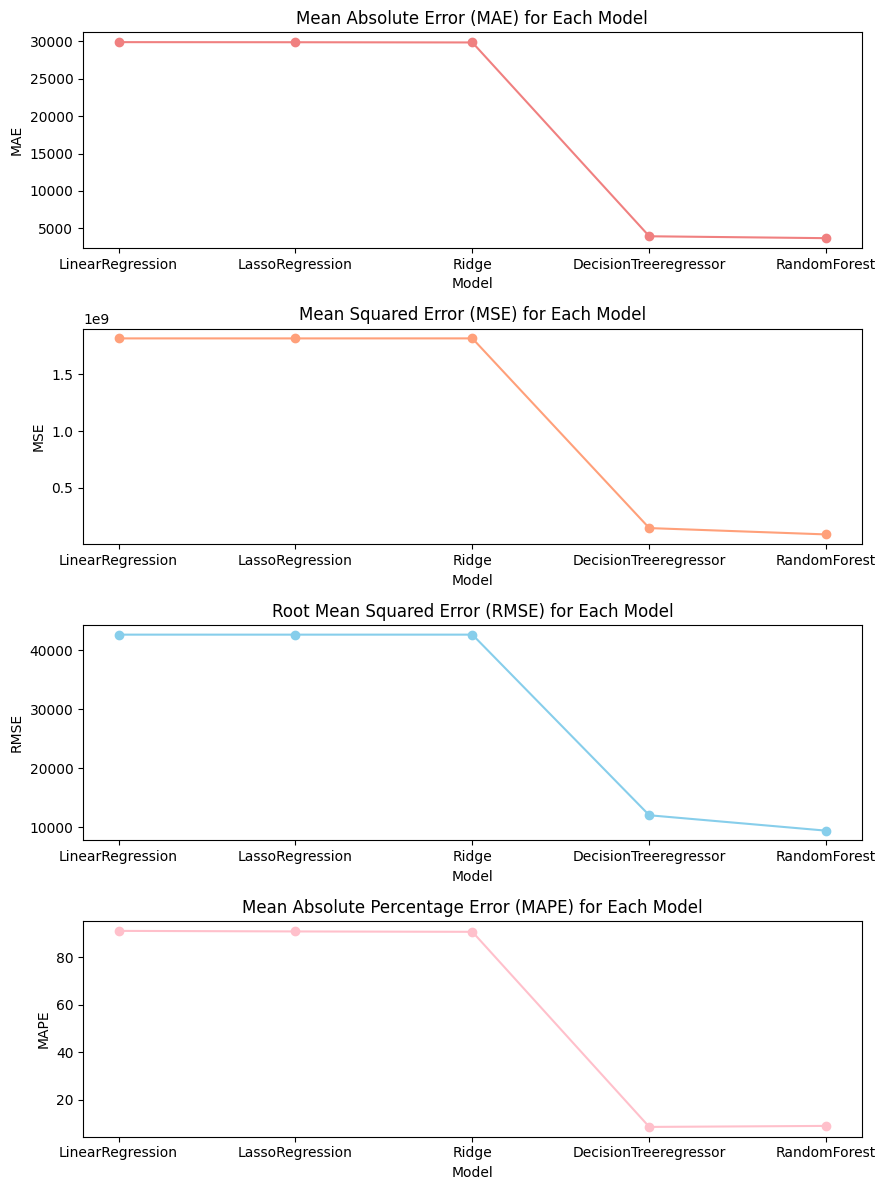

In [63]:
import matplotlib.pyplot as plt

models = ['LinearRegression', 'LassoRegression', 'Ridge', 'DecisionTreeregressor', 'RandomForest']
mae_scores = [29907.50933530433, 29893.99762450549, 29864.80254312207, 3944.6649315596683, 3691.0841873915556]
mse_scores = [1817339513.6468327, 1817244976.0757167, 1817403559.4368637, 144067309.2857143, 88179754.04573776]
rmse_scores = [42630.26523078214, 42629.156408211, 42631.01640163959, 12002.804225917971, 9390.407554826243]
mape_scores = [91.17512087073743, 90.9442181312444, 90.78277706033663, 8.591339987686561, 9.015080277807606]
r2_scores = [0.7473130309044326, 0.7473261756207235, 0.7473041258338915, 0.9799685576328501, 0.9877392888791059]

fig, ax = plt.subplots(4, 1, figsize=(9, 12))

# Plot MAE
ax[0].plot(models, mae_scores, marker='o', color='lightcoral', linestyle='-')
ax[0].set_title('Mean Absolute Error (MAE) for Each Model')
ax[0].set_xlabel('Model')
ax[0].set_ylabel('MAE')

# Plot MSE
ax[1].plot(models, mse_scores, marker='o', color='lightsalmon', linestyle='-')
ax[1].set_title('Mean Squared Error (MSE) for Each Model')
ax[1].set_xlabel('Model')
ax[1].set_ylabel('MSE')

# Plot RMSE
ax[2].plot(models, rmse_scores, marker='o', color='skyblue', linestyle='-')
ax[2].set_title('Root Mean Squared Error (RMSE) for Each Model')
ax[2].set_xlabel('Model')
ax[2].set_ylabel('RMSE')

# Plot MAPE
ax[3].plot(models, mape_scores, marker='o', color='pink', linestyle='-')
ax[3].set_title('Mean Absolute Percentage Error (MAPE) for Each Model')
ax[3].set_xlabel('Model')
ax[3].set_ylabel('MAPE')

plt.tight_layout()
plt.show()


In [59]:
#linear regression
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error,r2_score

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
models = {
    'lr':LinearRegression(),
    'lss':Lasso(),
    'Rid':Ridge(),
    'Dtr':DecisionTreeRegressor(),
    'Rfr': RandomForestRegressor(),
}
for name, md in models.items():
    md.fit(X_train_dummy,y_train)
    y_pred = md.predict(X_test_dummy)
    print(f"{name} : MAPE : {mean_absolute_percentage_error(y_test, y_pred)} score : {r2_score(y_test, y_pred)}") 
    

lr : MAPE : 91.17512087073743 score : 0.7473130309044326


C:\Users\ADMIN\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67280771830.01953, tolerance: 14848622817.505226
  model = cd_fast.sparse_enet_coordinate_descent(


lss : MAPE : 90.9442181312444 score : 0.7473261756207235
Rid : MAPE : 90.78277706033663 score : 0.7473041258338915
Dtr : MAPE : 8.391728601869753 score : 0.9799453950065663
Rfr : MAPE : 9.276330906503077 score : 0.9880598939480049


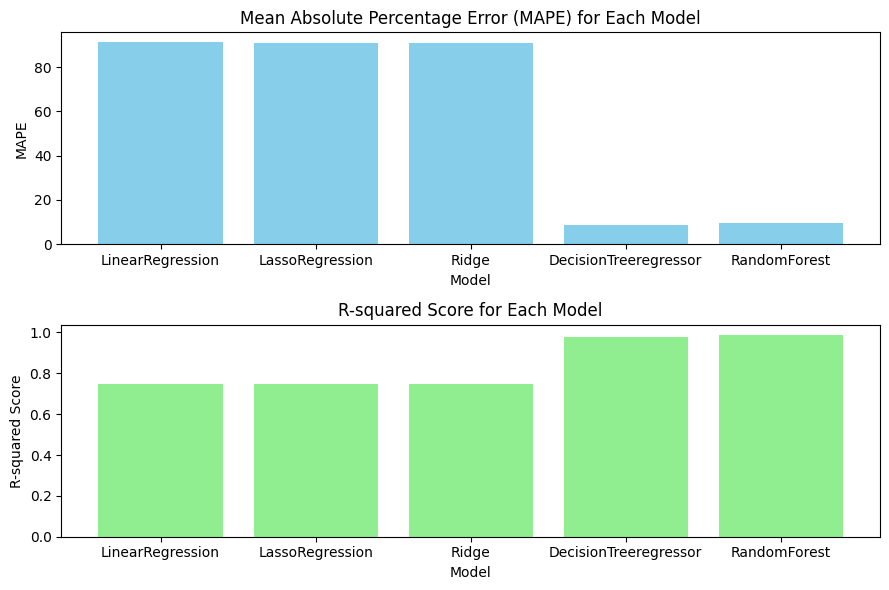

In [61]:
import matplotlib.pyplot as plt

models = ['LinearRegression', 'LassoRegression', 'Ridge', 'DecisionTreeregressor', 'RandomForest']
mape_scores = [91.17512087073743, 90.9442181312444,90.78277706033663,  8.565870625427621, 9.65245888481884]
r2_scores = [0.7473130309044326,0.7473261756207235,0.7473041258338915, 0.9786460479085943,0.9877612158285097]

fig, ax = plt.subplots(2, 1, figsize=(9, 6))

# Plot MAE
ax[0].bar(models, mape_scores, color='skyblue')
ax[0].set_title('Mean Absolute Percentage Error (MAPE) for Each Model')
ax[0].set_xlabel('Model')
ax[0].set_ylabel('MAPE')

# Plot R-squared score
ax[1].bar(models, r2_scores, color='lightgreen')
ax[1].set_title('R-squared Score for Each Model')
ax[1].set_xlabel('Model')
ax[1].set_ylabel('R-squared Score')

plt.tight_layout()
plt.show()


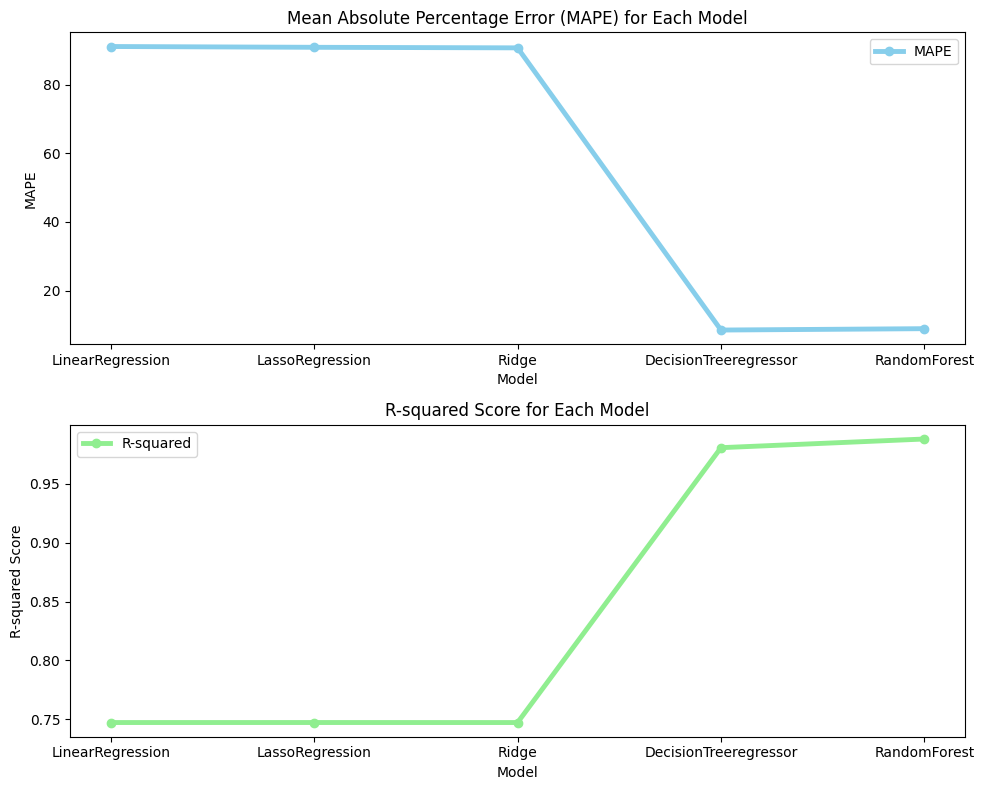

In [62]:
import matplotlib.pyplot as plt

models = ['LinearRegression', 'LassoRegression', 'Ridge', 'DecisionTreeregressor', 'RandomForest']

mape_scores = [91.17512087073743, 90.9442181312444,90.78277706033663, 8.468890538714035, 8.868702064749556  ]
r2_scores = [0.7473130309044326,0.7473261756207235,0.7473041258338915, 0.9805716297829495,0.9879274664498895]
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Plot MAE
ax[0].plot(models, mape_scores, marker='o', color='skyblue', label='MAPE',linewidth=3.5)
ax[0].set_title('Mean Absolute Percentage Error (MAPE) for Each Model')
ax[0].set_xlabel('Model')
ax[0].set_ylabel('MAPE')
ax[0].legend()

# Plot R-squared score
ax[1].plot(models, r2_scores, marker='o', color='lightgreen', label='R-squared',linewidth=3.5)
ax[1].set_title('R-squared Score for Each Model')
ax[1].set_xlabel('Model')
ax[1].set_ylabel('R-squared Score')
ax[1].legend()

plt.tight_layout()
plt.show()


In [74]:
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")  # Create the heatmap with correlation values annotated
plt.title('Correlation Heatmap of the Dataset')  # Set the title of the plot
plt.show() 

ValueError: could not convert string to float: 'Albania'

<Figure size 1000x800 with 0 Axes>

# Select model

In [85]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train_dummy,y_train)
dtr.predict(X_test_dummy)

array([35286., 22814., 19295., ..., 11488., 34879., 77391.])

# Predictive System

In [101]:
def prediction( Year,average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item):
    # Create an array of the input features
    features = np.array([[ Year,average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item]], dtype=object)

    # Transform the features using the preprocessor
    transformed_features = preprocesser.transform(features)

    # Make the prediction
    predicted_yield = dtr.predict(transformed_features).reshape(1, -1)

    return predicted_yield[0]

Year = 1990
average_rain_fall_mm_per_year =1485.0
pesticides_tonnes = 121.00
avg_temp = 16.37                   
Area = 'Albania'
Item = 'Maize'
result = prediction(Year,average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item)


C:\Users\ADMIN\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\ADMIN\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [88]:
result

array([36613.])

# Pickle Files

In [89]:
import pickle
pickle.dump(dtr,open('dtr.pkl','wb'))
pickle.dump(preprocesser,open('preprocessor.pkl','wb'))

In [90]:
import sklearn
print(sklearn.__version__)

1.3.2
